In [51]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns



In [53]:
df = pd.read_csv("Empolyee_Performance.csv")
df.head()

,EmpID,Name,Department,Experience,Attendance,TasksCompleted,Salary,PerformanceScore
0,E001,Rahul,IT,5,92.0,40.0,55000.0,85.0
1,E002,Anita,HR,3,88.0,35.0,45000.0,NaN
2,E003,Aman,IT,NaN,75.0,20.0,50000.0,60.0
3,E004,Pooja,Sales,4,90.0,NaN,48000.0,78.0
4,E005,Ravi,Sales,2,65.0,15.0,30000.0,45.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmpID             40 non-null     object 
 1   Name              40 non-null     object 
 2   Department        40 non-null     object 
 3   Experience        37 non-null     object 
 4   Attendance        37 non-null     float64
 5   TasksCompleted    39 non-null     float64
 6   Salary            39 non-null     float64
 7   PerformanceScore  38 non-null     float64
dtypes: float64(4), object(4)
memory usage: 2.6+ KB


In [55]:
df.isnull().sum()

EmpID               0
Name                0
Department          0
Experience          3
Attendance          3
TasksCompleted      1
Salary              1
PerformanceScore    2
dtype: int64

# Data Cleanig Start

In [56]:
df['Name'] = df['Name'].str.strip()
df['Department'] = df['Department'].str.strip().str.title()


In [57]:
df.head()

,EmpID,Name,Department,Experience,Attendance,TasksCompleted,Salary,PerformanceScore
0,E001,Rahul,It,5,92.0,40.0,55000.0,85.0
1,E002,Anita,Hr,3,88.0,35.0,45000.0,NaN
2,E003,Aman,It,NaN,75.0,20.0,50000.0,60.0
3,E004,Pooja,Sales,4,90.0,NaN,48000.0,78.0
4,E005,Ravi,Sales,2,65.0,15.0,30000.0,45.0


In [58]:
cols = ['Experience', 'Attendance', 'TasksCompleted', 'Salary', 'PerformanceScore']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [59]:
df.loc[df['Attendance'] > 100, 'Attendance'] = 100
df.loc[df['Attendance'] < 0, 'Attendance'] = np.nan

df.loc[df['Experience'] < 0, 'Experience'] = np.nan
df.loc[df['PerformanceScore'] > 100, 'PerformanceScore'] = 100


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmpID             40 non-null     object 
 1   Name              40 non-null     object 
 2   Department        40 non-null     object 
 3   Experience        33 non-null     float64
 4   Attendance        37 non-null     float64
 5   TasksCompleted    39 non-null     float64
 6   Salary            39 non-null     float64
 7   PerformanceScore  38 non-null     float64
dtypes: float64(5), object(3)
memory usage: 2.6+ KB


In [61]:
df.isnull().sum()

EmpID               0
Name                0
Department          0
Experience          7
Attendance          3
TasksCompleted      1
Salary              1
PerformanceScore    2
dtype: int64

# Handle missing Values

In [62]:
df['FinalScore'] = (
    df['Attendance'] * 0.4 +
    df['TasksCompleted'] * 0.3 +
    df['Experience'] * 0.2
).round(2)


In [63]:
def label(score):
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Good"
    elif score >= 40:
        return "Average"
    else:
        return "Poor"

df['PerformanceLevel'] = df['FinalScore'].apply(label)


In [64]:

df.groupby('Department')['FinalScore'].mean()


Department
Hr       45.622222
It       49.815385
Sales    39.412500
Name: FinalScore, dtype: float64

In [65]:
df['PerformanceLevel'].value_counts()


PerformanceLevel
Poor       19
Average    18
Good        3
Name: count, dtype: int64

In [66]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


In [67]:
dept_perf = df.groupby("Department")["FinalScore"].mean()
dept_perf


Department
Hr       45.622222
It       49.815385
Sales    39.412500
Name: FinalScore, dtype: float64

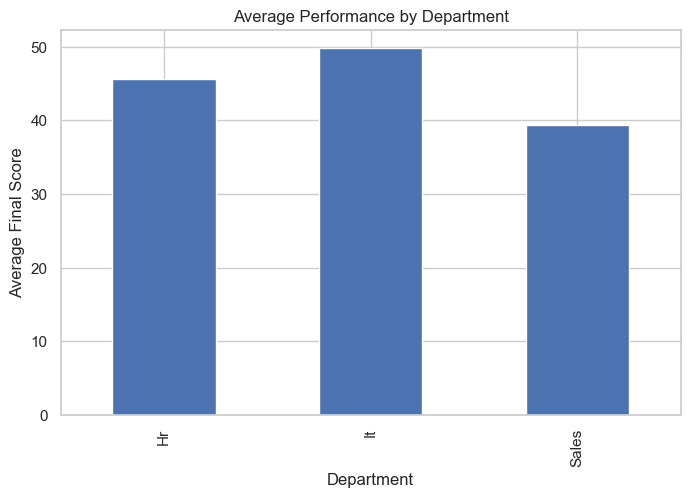

In [69]:
dept_perf.plot(kind='bar')
plt.title("Average Performance by Department")
plt.xlabel("Department")
plt.ylabel("Average Final Score")
plt.show()


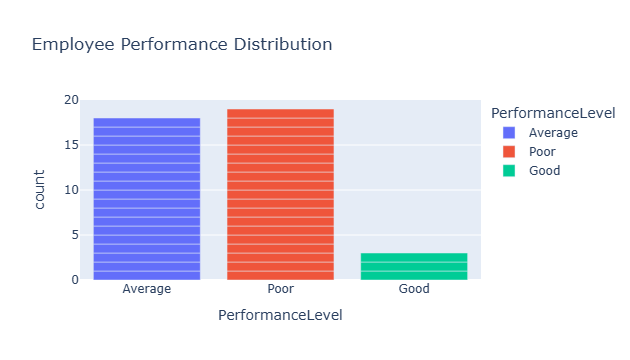

In [70]:
fig = px.bar(
    df,
    x="PerformanceLevel",
    color="PerformanceLevel",
    title="Employee Performance Distribution"
)
fig.show()
fig.write_html("Employee Performance Distribution.html")


In [71]:
df.sort_values(by="FinalScore", ascending=False).head(5)


,EmpID,Name,Department,Experience,Attendance,TasksCompleted,Salary,PerformanceScore,FinalScore,PerformanceLevel
30,E031,Neeraj,It,20.0,99.0,100.0,150000.0,100.0,73.6,Good
20,E021,Rohit,It,15.0,97.0,80.0,120000.0,100.0,65.8,Good
10,E011,Suresh,It,10.0,100.0,70.0,90000.0,100.0,63.0,Good
14,E015,Mohan,It,7.0,95.0,60.0,68000.0,98.0,57.4,Average
7,E008,Kiran,Sales,8.0,98.0,55.0,72000.0,96.0,57.3,Average


In [72]:
df.to_csv("employee_data_cleaned.csv", index=False)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmpID             40 non-null     object 
 1   Name              40 non-null     object 
 2   Department        40 non-null     object 
 3   Experience        33 non-null     float64
 4   Attendance        37 non-null     float64
 5   TasksCompleted    39 non-null     float64
 6   Salary            39 non-null     float64
 7   PerformanceScore  38 non-null     float64
 8   FinalScore        30 non-null     float64
 9   PerformanceLevel  40 non-null     object 
dtypes: float64(6), object(4)
memory usage: 3.3+ KB


In [77]:
df.head()

,EmpID,Name,Department,Experience,Attendance,TasksCompleted,Salary,PerformanceScore,FinalScore,PerformanceLevel
0,E001,Rahul,It,5.0,92.0,40.0,55000.0,85.0,49.8,Average
1,E002,Anita,Hr,3.0,88.0,35.0,45000.0,NaN,46.3,Average
2,E003,Aman,It,NaN,75.0,20.0,50000.0,60.0,NaN,Poor
3,E004,Pooja,Sales,4.0,90.0,NaN,48000.0,78.0,NaN,Poor
4,E005,Ravi,Sales,2.0,65.0,15.0,30000.0,45.0,30.9,Poor


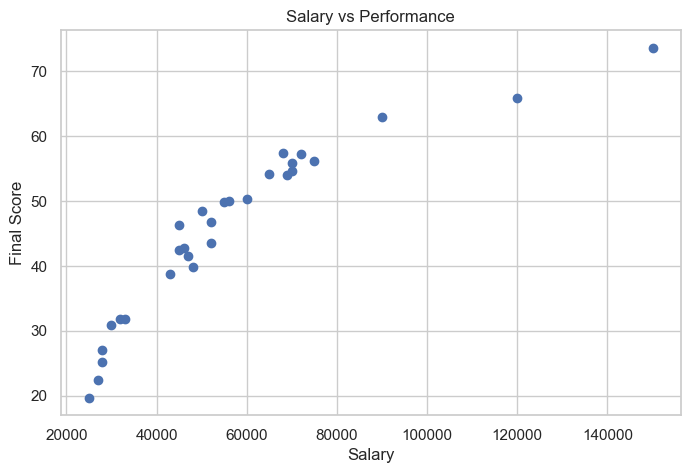

In [76]:
plt.scatter(df['Salary'], df['FinalScore'])
plt.title("Salary vs Performance")
plt.xlabel("Salary")
plt.ylabel("Final Score")
plt.show()


# Experience vs Performance

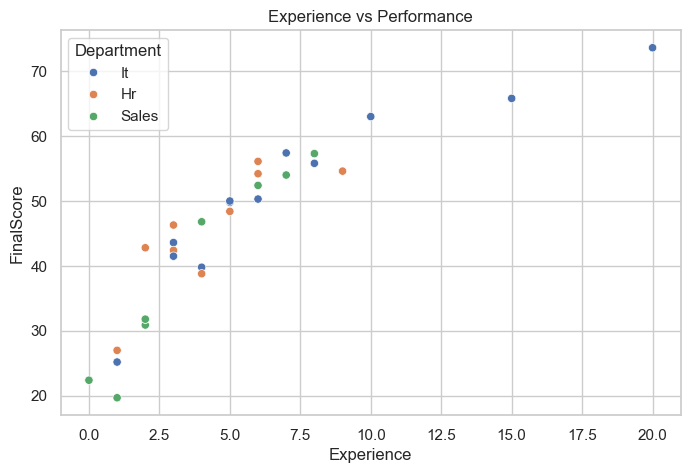

In [78]:
sns.scatterplot(
    data=df,
    x="Experience",
    y="FinalScore",
    hue="Department"
)

plt.title("Experience vs Performance")
plt.show()

# performance Level Count

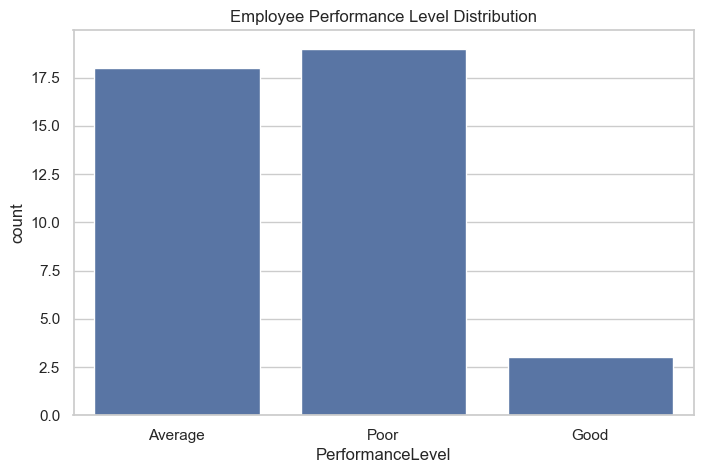

In [79]:
sns.countplot(
    data=df,
    x="PerformanceLevel"

)

plt.title("Employee Performance Level Distribution")
plt.show()

# Attendance vs Performance

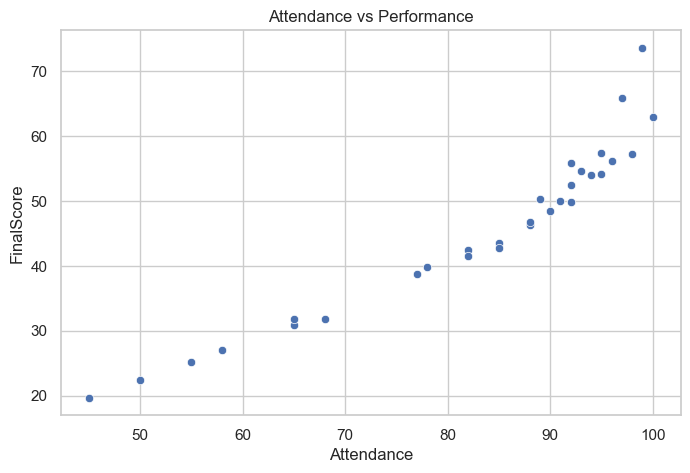

In [80]:
sns.scatterplot(
    data=df,
    x="Attendance",
    y="FinalScore"
)
plt.title("Attendance vs Performance")
plt.show()

# Department wise Performance

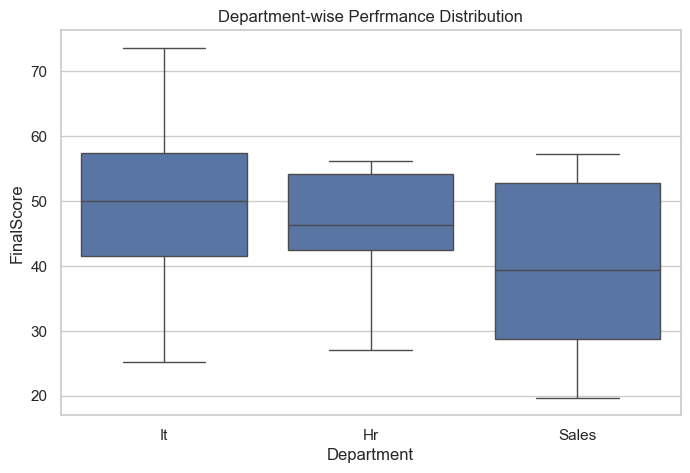

In [81]:
sns.boxplot(
    data=df,
    x="Department",
    y="FinalScore"
)
plt.title("Department-wise Perfrmance Distribution")
plt.show()

# Top five Performance

In [82]:
df.sort_values(by="FinalScore", ascending=False).head(5)

,EmpID,Name,Department,Experience,Attendance,TasksCompleted,Salary,PerformanceScore,FinalScore,PerformanceLevel
30,E031,Neeraj,It,20.0,99.0,100.0,150000.0,100.0,73.6,Good
20,E021,Rohit,It,15.0,97.0,80.0,120000.0,100.0,65.8,Good
10,E011,Suresh,It,10.0,100.0,70.0,90000.0,100.0,63.0,Good
14,E015,Mohan,It,7.0,95.0,60.0,68000.0,98.0,57.4,Average
7,E008,Kiran,Sales,8.0,98.0,55.0,72000.0,96.0,57.3,Average


In [83]:
top5 = df.sort_values(by="FinalScore", ascending=False).head(5)
top5


,EmpID,Name,Department,Experience,Attendance,TasksCompleted,Salary,PerformanceScore,FinalScore,PerformanceLevel
30,E031,Neeraj,It,20.0,99.0,100.0,150000.0,100.0,73.6,Good
20,E021,Rohit,It,15.0,97.0,80.0,120000.0,100.0,65.8,Good
10,E011,Suresh,It,10.0,100.0,70.0,90000.0,100.0,63.0,Good
14,E015,Mohan,It,7.0,95.0,60.0,68000.0,98.0,57.4,Average
7,E008,Kiran,Sales,8.0,98.0,55.0,72000.0,96.0,57.3,Average


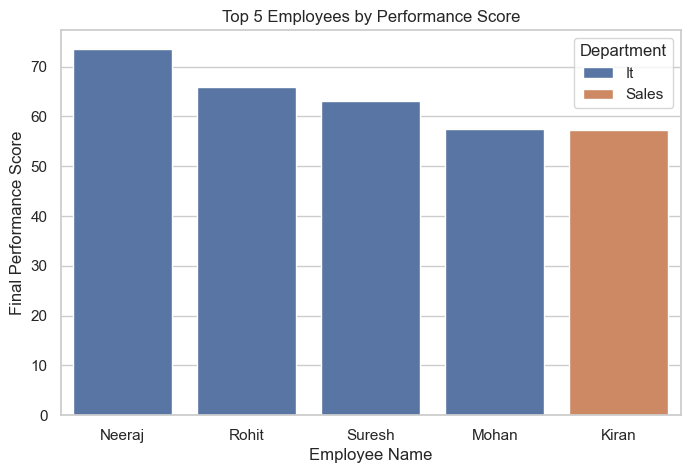

In [84]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=top5,
    x="Name",
    y="FinalScore",
    hue="Department"
)

plt.title("Top 5 Employees by Performance Score")
plt.xlabel("Employee Name")
plt.ylabel("Final Performance Score")
plt.show()


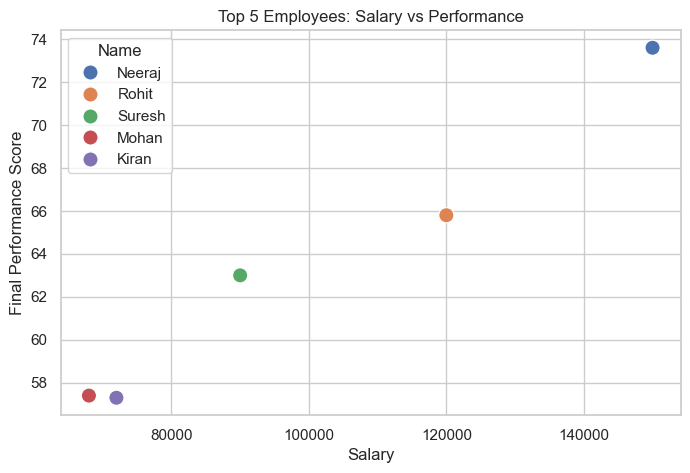

In [85]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    data=top5,
    x="Salary",
    y="FinalScore",
    hue="Name",
    s=120
)

plt.title("Top 5 Employees: Salary vs Performance")
plt.xlabel("Salary")
plt.ylabel("Final Performance Score")
plt.show()


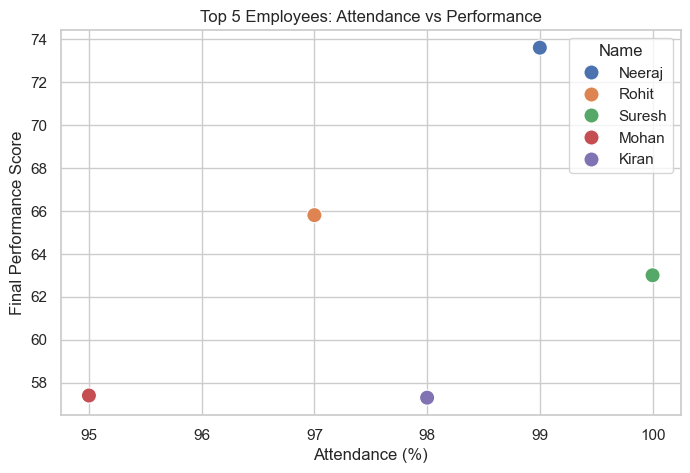

In [88]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    data=top5,
    x="Attendance",
    y="FinalScore",
    hue="Name",
    s=120
)

plt.title("Top 5 Employees: Attendance vs Performance")
plt.xlabel("Attendance (%)")
plt.ylabel("Final Performance Score")
plt.show()


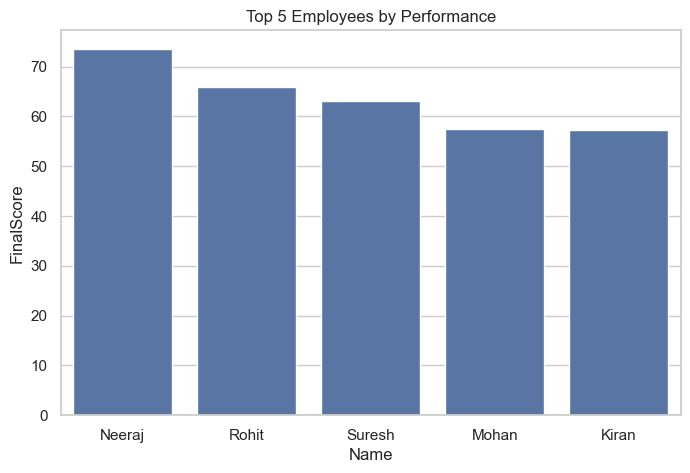

In [90]:
plt.figure(figsize=(8,5))
sns.barplot(data=top5, x="Name", y="FinalScore")
plt.title("Top 5 Employees by Performance")
plt.savefig("top_5_employees_performance.png")
plt.show()


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmpID             40 non-null     object 
 1   Name              40 non-null     object 
 2   Department        40 non-null     object 
 3   Experience        33 non-null     float64
 4   Attendance        37 non-null     float64
 5   TasksCompleted    39 non-null     float64
 6   Salary            39 non-null     float64
 7   PerformanceScore  38 non-null     float64
 8   FinalScore        30 non-null     float64
 9   PerformanceLevel  40 non-null     object 
dtypes: float64(6), object(4)
memory usage: 3.3+ KB
